#**CHAPTER 9. CROSS ASSET MACRO COUPLING**
---

##0.REFERENCE

https://chatgpt.com/share/698a0abd-4e04-8012-b445-7f9bb7428ee0

##1.CONTEXT

**Introduction — Chapter 9: Cross-Asset Macro Coupling (Correlation as a Tradable Surface)**

**Scope and intent**

This notebook is a mechanism laboratory built to make one empirical fact of markets feel mechanically inevitable: when stress arrives, cross-asset diversification often fails in the precise window when it is most needed. The notebook does not attempt to forecast stress, predict returns, or justify a “strategy.” It constructs a synthetic but economically interpretable world in which cross-asset linkages are outcomes of a latent stress factor, balance-sheet constraints, and regime persistence. The objective is to give the reader a controlled environment where correlation is not an after-the-fact statistic but an equilibrium object that changes the payoff geometry of any portfolio posture. In this setting, the “surface” is not a yield curve or a volatility smile. It is a regime-indexed correlation tensor and its observed rolling covariance analogue. This surface is tradable in the most operational sense: it determines how risk aggregates, how hedges behave, how leverage binds, and how quickly a seemingly sensible posture becomes a fragile one once execution costs and coupling tighten.

**Economic context: why cross-asset coupling exists**

Cross-asset coupling is not a nuisance parameter; it is the market’s coordination mechanism under shared constraints. Equity, rates, credit, and FX are distinct asset classes with distinct microfoundations, yet they are connected by a small set of macroeconomic primitives: growth and inflation expectations, policy reaction functions, funding conditions, and risk-bearing capacity. When these primitives are stable and balance sheets are unconstrained, idiosyncratic variation dominates and correlations can be moderate, mixed, or even negative in economically meaningful ways. Under stress, however, the marginal investor’s problem changes. Balance sheets become binding, margin requirements rise, VaR constraints bite, and funding liquidity becomes scarce. Those constraints propagate through portfolios and dealers, making exposures that were economically diverse look similar from the standpoint of liquidation pressure. The result is a strengthening of the common component of returns: the world becomes “one trade,” not because the assets are literally identical, but because forced risk reduction transmits a shared shock across them.

This notebook encodes that logic using a latent stress factor that evolves with regime persistence and regime-dependent volatility. In calm states, stress innovations are small, tail events are rare, and the structural correlation matrix is relatively dispersed. In stress states, innovations are larger, tails are more frequent, and the structural correlation matrix compresses toward higher average correlation and higher eigenvalue concentration. This is a deliberately mechanism-first stance: correlation is not treated as noise to be estimated; it is treated as a causal output of a state variable that also governs liquidity and execution conditions.

**Why the mechanism matters for portfolio construction**

In professional risk management, “diversification” is often discussed as if it were a static property: choose enough assets, keep correlations low, and risk will average out. The mechanism taught here is that diversification is regime-local and constraint-dependent. Even if the unconditional correlation between equity and rates is negative over a long sample, the conditional correlation at the peak of a stress event may be near zero or may flip sign. Even if credit is modeled as a separate risk driver, credit spreads can widen precisely when equity falls, not because the instruments are the same, but because the underlying constraint set is shared. In that world, the primary risk is not a wrong mean forecast. It is the wrong assumption about the shape of the payoff surface under stress and the feasibility of moving across that surface when liquidity deteriorates.

A second implication is that hedging is also regime-local. A hedge that works in calm may fail in transition, not because the hedge is “bad,” but because the relationship it exploits is an equilibrium outcome that depends on policy and funding. This notebook operationalizes hedge reliability through a simple proxy: the equity–rates correlation implied by rolling covariance. It is not meant as a sufficient statistic; it is meant as a reminder that hedges are contracts with an equilibrium, not invariants of the universe.

**What this notebook demonstrates**

The notebook demonstrates three connected layers of structure.

First, it constructs a regime process and a latent stress factor that jointly shape return covariance across a four-asset macro set: Equity, Rates, Credit, and FX. Returns contain a drift component that can be read as a small compensation for bearing risk in calm, and a tail component that becomes more likely in stress. Crucially, the stress factor loads with economically interpretable signs across assets. Equity and credit are positively exposed to stress shocks (risk-off episodes harm them), rates are negatively exposed (flight-to-quality rallies), and FX carries an intermediate structure. This creates a coherent macro coupling pattern without introducing prediction as the aim.

Second, it builds the tradable surface in two forms. The structural surface is a correlation tensor indexed by regime, representing the equilibrium coupling pattern conditional on each regime. The observed surface is a rolling covariance cube, representing what a practitioner might estimate in real time with finite samples. From the observed cube, the notebook extracts coupling summaries that matter directly for portfolio mechanics: average correlation (a coarse measure of coupling level), the top eigenvalue share (a measure of “one-factor dominance”), and an equity–rates correlation proxy (a coarse hedge-effectiveness indicator). These summaries are not decorative. They are the variables that a constrained agent can act upon without pretending to have full state knowledge.

Third, it runs a closed-loop portfolio and execution environment in which the agent chooses only among three discrete actions: RISK_ON, RISK_OFF, and NEUTRAL. Each action maps to a target vector of exposures across the four assets. The mapping references the tradable surface in an explicit way: targets are risk-parity scaled using the rolling covariance cube, and gross exposure is penalized when eigenvalue concentration is high, reflecting the fact that diversification is less effective when one common factor dominates. This is a structural risk management rule, not an alpha claim. The environment then enforces execution realism via turnover-based costs, a regime-dependent liquidity multiplier, and an impact proxy that worsens as both stress and coupling rise. The point is to show that the ability to change posture is itself state-dependent, and that “doing the right thing” can be expensive or even infeasible at the margin.

**Agentic structure: bounded decisions under audit**

The agentic architecture is intentionally narrow. The agent does not set parameters, does not tune thresholds, does not invent new actions, and does not write code. It chooses among a finite menu of postures, and provides a short rationale that must be mechanism-aware and execution-aware. Every decision is logged with timestamp, state summary, surface summary, chosen action, rationale, executed trade, costs, leverage usage, and realized PnL contribution. This creates an audit trail that makes the policy legible and reproducible. The notebook includes a deterministic baseline rule policy so that behavior remains stable even when the optional LLM policy is disabled or invalid. If the optional LLM is enabled, it must output machine-parseable JSON that contains only an allowed action and a short rationale. If it fails, the system falls back to the baseline. This design turns the LLM from a controller into an action selector under constraints, which is the relevant professional stance for using language models in risk-bearing workflows.

**How surfaces arise: correlation as an equilibrium object**

A central pedagogical move in this chapter is to treat the correlation surface as the “price of risk geometry.” In many markets, a curve is a price object: a yield curve prices time; an implied volatility surface prices convexity; a credit spread curve prices default and liquidity premia. Here, the surface prices something more primitive: how risks add. Covariance determines the mapping from positions to portfolio variance, the effectiveness of hedges, and the marginal contribution of each asset to total risk. In calm, the surface can be relatively favorable: correlations are moderate, eigenvalues are dispersed, and the addition of an asset can genuinely reduce variance. In stress, the surface becomes punitive: correlations rise, eigenvalues concentrate, and incremental assets do not add diversification. The “price” here is the reduction in degrees of freedom for risk sharing.

The notebook makes this concrete by separating the structural tensor (regime-indexed correlation) from the observed rolling covariance cube. That separation matters because practitioners do not observe the structural object directly; they infer it with noisy, finite-sample estimates. The observed surface is itself part of the mechanism, because estimation error and lag can cause the agent to pay turnover costs in response to transient signals. This is one reason the action space is coarse: if the world is uncertain and execution is costly, fine-grained re-optimization is not necessarily rational.

**Execution realism: costs, liquidity, and survival constraints**

Execution is the mechanism that converts theoretical posture into realized outcomes. In frictionless models, one can rebalance continuously, enforce risk parity exactly, and move instantly from risk-on to risk-off. In actual markets, trading when stress is high is precisely when liquidity is worst and price impact is greatest. The notebook encodes this by scaling costs with turnover and multiplying those costs by a regime-dependent liquidity factor. It then adds an impact proxy that increases with stress and with coupling, capturing the idea that when the world becomes one trade, everyone tries to do the same thing at once. In such circumstances, the market does not merely move against you; it also charges you more to move.

The environment also enforces leverage limits and position bounds, so that the portfolio cannot scale exposures unrealistically. In addition, it enforces a drawdown stop that forces de-risking when losses exceed a threshold. This is not a “risk management feature” bolted on at the end; it is part of the mechanism. Institutional portfolios are constrained by survival and governance. When drawdowns accumulate, discretion shrinks, and the feasible set of actions collapses. This is exactly the economic context in which coupling becomes dangerous: it increases the probability that many positions lose together, triggering constraints simultaneously.

**Mechanism-first thinking: causality before optimization**

The correct way to read this notebook is not as an attempt to optimize a trading rule, but as an attempt to map a causal chain. A latent stress factor and regime dynamics shape return covariance and tail behavior. That covariance surface shapes portfolio risk aggregation and hedge effectiveness. Execution conditions worsen as stress and coupling rise, making transitions expensive. Constraints bind more often, making survival rules active. The agent operates in this world with limited actions and limited information, and the logs reveal when and why each posture was chosen and what it cost to implement. The student’s job is to interrogate the surface and the constraints: when does diversification help, when does it fail, and what is the price of moving from one regime-local “optimal” posture to another under real execution frictions?

If the chapter succeeds, the reader will leave with a sharper professional intuition: correlation is not a background statistic; it is a tradable, regime-dependent geometry. In calm, the surface pays for bearing risk slowly. In stress, the surface charges quickly, and it often charges through constraints and execution costs rather than through a simple change in expected returns. The lesson is structural, not predictive, and the laboratory exists to make that structure visible and testable.


##2.LIBRARIES AND ENVIRONMENT

In [1]:
# %% CELL 2 — CODE: INSTALL / IMPORTS / RUN CONFIG / UTILITIES / AUDIT ARTIFACTS

# --- Install OpenAI SDK (Colab) ---
try:
    import openai  # noqa: F401
except Exception:
    !pip -q install openai>=1.40.0

import os, json, time, math, hashlib, platform, sys
from dataclasses import dataclass
from typing import Dict, Any, List, Tuple, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Colab secrets loader (best-effort) ---
OPENAI_API_KEY = None
try:
    from google.colab import userdata
    OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")
except Exception:
    OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

# --- Reproducibility ---
def stable_hash(s: str) -> str:
    return hashlib.sha256(s.encode("utf-8")).hexdigest()

def now_utc_iso() -> str:
    return time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime())

def env_fingerprint() -> Dict[str, Any]:
    return {
        "python": sys.version.split()[0],
        "platform": platform.platform(),
        "numpy": np.__version__,
        "pandas": pd.__version__,
        "matplotlib": plt.matplotlib.__version__,
        "openai_key_present": bool(OPENAI_API_KEY),
        "ts_utc": now_utc_iso(),
    }

# --- RUN CONFIG (Chapter 9) ---
run_config = {
    "chapter_id": 9,
    "chapter_name": "Cross-Asset — Macro Coupling",
    "seed": 9,
    "T": 100,
    "dt": 1.0,

    "assets": ["EQUITY", "RATES", "CREDIT", "FX"],
    "regimes": {
        "names": ["calm", "transition", "stress"],
        # Markov transition matrix: rows sum to 1
        "markov_P": [
            [0.965, 0.030, 0.005],  # calm
            [0.080, 0.860, 0.060],  # transition
            [0.020, 0.120, 0.860],  # stress
        ],
        "notes": "Regime controls factor vol, cross-asset coupling, and liquidity (execution costs).",
    },

    "market_params": {
        "mechanism": "latent stress factor amplifies coupling + worsens execution; diversification collapses in stress",
        # Stress factor dynamics (AR(1) + regime-dependent shocks)
        "stress_phi": 0.92,
        "stress_sigma": {"calm": 0.40, "transition": 0.85, "stress": 1.40},
        # Common-factor loadings by asset (signs chosen to reflect classic risk-off patterns)
        # equity: +, rates: - (rates rally when stress rises), credit: +, fx: + (risk FX sells off)
        "beta": {"EQUITY": +1.10, "RATES": -0.70, "CREDIT": +0.95, "FX": +0.55},
        # Idiosyncratic vol (baseline)
        "idio_sigma": {"EQUITY": 1.00, "RATES": 0.55, "CREDIT": 0.80, "FX": 0.65},
        # Regime-dependent amplification of idio vol
        "idio_mult": {"calm": 0.90, "transition": 1.10, "stress": 1.60},
        # Tail shock probability (stress-driven)
        "tail_p": {"calm": 0.002, "transition": 0.006, "stress": 0.020},
        "tail_scale": {"EQUITY": 3.2, "RATES": 1.6, "CREDIT": 2.7, "FX": 2.2},
    },

    "surface_params": {
        "surface_type": "correlation_tensor",
        "construction": "regime-indexed correlation matrices + observed rolling covariance cube",
        "roll_window": 60,
    },

    "execution_params": {
        "cost_fixed": 0.0,
        "cost_bps": 1.5,            # proportional cost (bps of notional turned over)
        "slippage_lambda": 0.18,    # impact proxy coefficient
        "impact_proxy": "abs(trade)*slippage_lambda*(1+stress_level)*(1+avg_corr)",
        "liquidity_mult": {"calm": 1.0, "transition": 1.6, "stress": 3.0},
    },

    "risk_params": {
        "max_leverage": 2.0,   # L1 leverage cap on gross exposure
        "pos_limit": 1.0,      # per-asset absolute position bound
        "max_dd_stop": 0.22,   # drawdown stop (forces NEUTRAL)
    },

    "policy_params": {
        "enable_llm": True,
        "llm_model": "gpt-4o-mini",
        "llm_temperature": 0.0,
        "fallback_to_baseline_on_error": True,
        "telemetry_every": 25,
        "max_llm_calls": 10_000,  # safety (won't bind in typical runs)
    },
}

np.random.seed(run_config["seed"])

# --- Output directories + audit artifacts ---
BASE_DIR = "/content"
DELIV_DIR = os.path.join(BASE_DIR, "deliverables_ch9")
os.makedirs(DELIV_DIR, exist_ok=True)

run_id = f"ch9_{run_config['seed']}_{int(time.time())}"
config_hash = stable_hash(json.dumps(run_config, sort_keys=True))
manifest = {
    "run_id": run_id,
    "ts_utc": now_utc_iso(),
    "config_hash": config_hash,
    "run_config": run_config,
    "env_fingerprint": env_fingerprint(),
    "verification_status": "Not verified",
}

with open(os.path.join(DELIV_DIR, "run_manifest.json"), "w") as f:
    json.dump(manifest, f, indent=2)

# Prompt + risk logs (JSONL / JSON)
PROMPTS_LOG_PATH = os.path.join(DELIV_DIR, "prompts_log.jsonl")
RISK_LOG_PATH = os.path.join(DELIV_DIR, "risk_log.json")
risk_log = {
    "verification_status": "Not verified",
    "risks": [
        {"id": "R1", "risk": "LLM may output invalid JSON or unauthorized action", "control": "strict JSON parse + action whitelist + fallback"},
        {"id": "R2", "risk": "Agent tries to change parameters/code", "control": "prompt forbids + parser only accepts action+rationale"},
        {"id": "R3", "risk": "Run non-reproducible", "control": "seed + config hash + manifest + full step logs"},
    ],
}
with open(RISK_LOG_PATH, "w") as f:
    json.dump(risk_log, f, indent=2)

print("READY:", {"run_id": run_id, "deliverables_dir": DELIV_DIR, "config_hash": config_hash, "openai_key_present": bool(OPENAI_API_KEY)})


READY: {'run_id': 'ch9_9_1770653031', 'deliverables_dir': '/content/deliverables_ch9', 'config_hash': '2e055d5b002770c19b371a70758ef635006d4659f2429c32ee8eb1b23ffceff8', 'openai_key_present': True}


##3.REGIME PROCESS

###3.1.OVERVIEW



Cell 3 constructs the hidden “macro clock” of the laboratory: a regime process and a latent stress factor that together determine how the entire cross-asset system behaves. The regime process is explicitly Markov, which matters because persistence is a mechanism, not a detail. If stress states are short-lived, many defensive adjustments are unnecessary; if stress states persist, delayed de-risking can be structurally catastrophic. By making regime transitions explicit and parameterized, the notebook forces the reader to confront a professional reality: the frequency and persistence of stress governs whether portfolio management is an optimization problem or a survival problem.

The latent stress factor is the second key object introduced in this cell. It is modeled as an autoregressive process with regime-dependent innovation variance, so that stress behaves differently across regimes. In calm periods, stress innovations are small; in transition and stress, innovations are larger. This mirrors the empirical fact that risk conditions deteriorate in bursts rather than linearly. The stress factor is then mapped into an interpretable bounded measure, a stress level, which is what later components can use as a state summary. This mapping is pedagogical: the notebook does not ask the agent to reason about unbounded latent variables; it asks the agent to respond to a compact state description consistent with bounded decision-making.

This cell also defines synthetic “macro indicators” that are observable proxies for regime attributes, such as a policy shock indicator in transition regimes and a credit strain indicator in stress regimes. These indicators are not meant to be realistic macro data. They are simple state flags that allow later policies to be expressed in clear conditional logic. The learning objective is to show how even coarse regime indicators can be sufficient to produce qualitatively correct behavior in a constrained action space, while still preserving the idea that the true driver is a latent common factor.

In the agentic flow, Cell 3 is the causal root. Everything that happens later—correlation compression, tail clustering, liquidity deterioration, and costly rebalancing—depends on the regime path and stress innovations built here. If this cell is removed or made purely statistical, the notebook becomes a curve-fitting exercise. With this cell, it becomes a mechanism laboratory in which the reader can vary persistence, variance, and transition probabilities to test hypotheses about fragility under coupling.


###3.2.CODE AND IMPLEMENTATION

In [2]:
# %% CELL 3 — CODE: REGIME PROCESS + STRESS FACTOR + STATE EVOLUTION

regime_names = run_config["regimes"]["names"]
P = np.array(run_config["regimes"]["markov_P"], dtype=float)
assert np.allclose(P.sum(axis=1), 1.0), "Markov rows must sum to 1."

regime_to_idx = {n: i for i, n in enumerate(regime_names)}
idx_to_regime = {i: n for i, n in enumerate(regime_names)}

T = int(run_config["T"])
roll_w = int(run_config["surface_params"]["roll_window"])

# --- Simulate regimes ---
regime_idx = np.zeros(T, dtype=int)
regime_idx[0] = regime_to_idx["calm"]
u = np.random.rand(T)

for t in range(1, T):
    prev = regime_idx[t-1]
    regime_idx[t] = int(np.searchsorted(np.cumsum(P[prev]), u[t], side="right"))

regime = np.array([idx_to_regime[i] for i in regime_idx], dtype=object)

# --- Stress factor: AR(1) with regime-dependent innovations ---
phi = float(run_config["market_params"]["stress_phi"])
sig_by_reg = run_config["market_params"]["stress_sigma"]

stress = np.zeros(T, dtype=float)
for t in range(1, T):
    sig = float(sig_by_reg[regime[t]])
    eps = np.random.normal(0.0, sig)
    # mild mean reversion towards 0; phi < 1 already does this
    stress[t] = phi * stress[t-1] + eps

# --- Map stress to a bounded "stress level" proxy in [0, 1] for execution + policy ---
# Use logistic transform to compress extremes; center at 0.
stress_level = 1.0 / (1.0 + np.exp(-0.85 * stress))

# --- Regime indicators (explicit synthetic macro flags) ---
# Think: policy shock proxy, credit strain proxy, FX funding proxy, etc.
# These are *observables* derived from state, not hidden truths.
macro_flags = pd.DataFrame({
    "policy_tightening": (regime == "transition").astype(int),
    "systemic_stress": (regime == "stress").astype(int),
    "risk_appetite": (regime == "calm").astype(int),
    "stress_level": stress_level,
})

print("STATE READY:", {
    "T": T,
    "regime_counts": dict(pd.Series(regime).value_counts()),
    "stress_level_range": (float(stress_level.min()), float(stress_level.max()))
})


STATE READY: {'T': 100, 'regime_counts': {'calm': np.int64(61), 'stress': np.int64(20), 'transition': np.int64(19)}, 'stress_level_range': (0.09603540199538636, 0.99637773846021)}


In [9]:
# %% CELL 3 — FIX (RUN ONCE AFTER CELL 3; SAFE EVEN IF IT ALREADY EXISTS)
# Your kernel is missing `macro`. This recreates it deterministically from `regime` and `stress_level`,
# consistent with Chapter 9's state design.

import pandas as pd
import numpy as np

# Ensure regime and stress_level exist
assert "regime" in globals(), "Missing `regime`. Re-run Cell 3 (regime process)."
assert "stress_level" in globals(), "Missing `stress_level`. Re-run Cell 3 (stress factor)."

macro = pd.DataFrame({
    "policy_shock": (regime == "transition").astype(int),
    "credit_strain": (regime == "stress").astype(int),
    "risk_appetite": (regime == "calm").astype(int),
    "stress_level": stress_level,
})

print("FIXED: macro ready.", {"cols": macro.columns.tolist(), "head": macro.head(3).to_dict(orient="records")})


FIXED: macro ready. {'cols': ['policy_shock', 'credit_strain', 'risk_appetite', 'stress_level'], 'head': [{'policy_shock': 0, 'credit_strain': 0, 'risk_appetite': 1, 'stress_level': 0.5}, {'policy_shock': 0, 'credit_strain': 0, 'risk_appetite': 1, 'stress_level': 0.4604879960163906}, {'policy_shock': 0, 'credit_strain': 0, 'risk_appetite': 1, 'stress_level': 0.4402771491856171}]}


##4.MARKET SIMULATOR

###4.1.OVERVIEW



Cell 4 constructs the synthetic market and, crucially, produces the tradable surface for this chapter: correlation and covariance as regime-dependent risk geometry. The cell begins by specifying a structural correlation tensor indexed by regime. This is a deliberate modeling choice. In real markets, correlation patterns differ across states: hedges work differently, credit behaves more like equity in stress, and FX can act as a funding channel. Encoding a regime-indexed correlation object makes correlation an equilibrium output of state, not a residual. It also supports the central lesson: diversification is regime-local.

The cell then generates returns for the four assets—equity, rates, credit, and FX—using a decomposition that reflects macro causality. A common component is driven by innovations in the latent stress factor. The sign and magnitude of each asset’s loading on stress reflects an interpretable risk-off pattern: risk assets tend to suffer when stress rises, while rates benefit through flight-to-quality. Around that common component, the cell adds idiosyncratic shocks that are correlated according to the regime-specific correlation matrix and scaled by regime-dependent volatility multipliers. This creates a world in which both volatility and correlation respond to state, which is a more structurally faithful representation than a model where only volatility changes.

To capture the asymmetry of calm versus stress, the cell adds tail shocks whose probability and scale rise in stress regimes. This is not a performance trick; it is a fragility mechanism. Tail clustering is what forces constraints to bind and makes the timing of de-risking matter. The cell also includes a small drift component that can be interpreted as a calm-state compensation for bearing risk. Importantly, this drift is attenuated or reversed in stress, reinforcing the idea that premia are state-dependent and that negative convexity can dominate.

The tradable surface appears in two forms. First, the structural tensor is the regime-level surface. Second, the rolling covariance cube is the observed surface that a practitioner would estimate in real time. The cell computes rolling covariances and extracts interpretable surface summaries: average correlation as a coupling level, the share of variance explained by the top eigenvalue as a measure of common-factor dominance, and an equity–rates correlation proxy as a hedge-reliability indicator. These summaries later drive both baseline decisions and LLM decisions. The learning objective is to make the reader see covariance not as a diagnostic after the fact, but as the object that determines the payoff geometry of any posture and the plausibility of rebalancing across postures.


###4.2.CODE AND IMPLEMENTATION

In [3]:
# %% CELL 4 — CODE: MARKET SIMULATOR + TRADABLE SURFACE (CORRELATION TENSOR + ROLLING COV CUBE)

assets = run_config["assets"]
A = len(assets)

beta = run_config["market_params"]["beta"]
idio_sigma = run_config["market_params"]["idio_sigma"]
idio_mult = run_config["market_params"]["idio_mult"]
tail_p = run_config["market_params"]["tail_p"]
tail_scale = run_config["market_params"]["tail_scale"]

# --- Regime-indexed "structural" correlation tensor (A x A x R) ---
# Construct stylized correlations capturing macro coupling:
# calm: modest coupling, some diversification
# transition: coupling rising
# stress: high coupling (one trade)
corr_tensor = np.zeros((A, A, len(regime_names)), dtype=float)

# base templates (symmetric, PSD-ish by construction)
corr_calm = np.array([
    [1.00, -0.25,  0.35,  0.15],
    [-0.25, 1.00, -0.15, -0.10],
    [0.35, -0.15, 1.00,  0.20],
    [0.15, -0.10, 0.20,  1.00],
], dtype=float)

corr_trans = np.array([
    [1.00, -0.15,  0.55,  0.30],
    [-0.15, 1.00, -0.10, -0.05],
    [0.55, -0.10, 1.00,  0.35],
    [0.30, -0.05, 0.35,  1.00],
], dtype=float)

corr_stress = np.array([
    [1.00, -0.05,  0.80,  0.55],
    [-0.05, 1.00, -0.02,  0.05],
    [0.80, -0.02, 1.00,  0.60],
    [0.55, 0.05, 0.60,  1.00],
], dtype=float)

# ensure symmetry + diagonals = 1
def symm_unitdiag(M):
    M = 0.5*(M + M.T)
    np.fill_diagonal(M, 1.0)
    return M

corr_tensor[:, :, regime_to_idx["calm"]] = symm_unitdiag(corr_calm)
corr_tensor[:, :, regime_to_idx["transition"]] = symm_unitdiag(corr_trans)
corr_tensor[:, :, regime_to_idx["stress"]] = symm_unitdiag(corr_stress)

# --- Generate returns using: r_t = beta * f_t + L_reg * e_t + tail_shocks
# where L_reg is Cholesky of corr_reg scaled by idio vols.
rets = np.zeros((T, A), dtype=float)

def safe_cholesky(C: np.ndarray, jitter: float = 1e-6) -> np.ndarray:
    # add jitter until PSD for numerical stability
    for k in range(8):
        try:
            return np.linalg.cholesky(C + jitter * np.eye(C.shape[0]))
        except np.linalg.LinAlgError:
            jitter *= 10.0
    # fall back to eigen repair
    w, V = np.linalg.eigh(C)
    w = np.clip(w, 1e-8, None)
    C2 = V @ np.diag(w) @ V.T
    return np.linalg.cholesky(C2 + 1e-8*np.eye(C2.shape[0]))

for t in range(T):
    rname = regime[t]
    r_idx = regime_to_idx[rname]
    C = corr_tensor[:, :, r_idx]
    L = safe_cholesky(C)
    e = np.random.normal(0.0, 1.0, size=A)
    # idio vols regime-scaled
    sig_vec = np.array([idio_sigma[a]*idio_mult[rname] for a in assets], dtype=float)

    # common factor shock is stress innovation proxy (use stress differences for "news")
    # This makes returns react to *changes* in stress, not level alone.
    if t == 0:
        f = 0.0
    else:
        f = stress[t] - stress[t-1]

    base = np.array([beta[a] for a in assets], dtype=float) * f
    idio = (L @ e) * sig_vec

    # tail shocks: regime-dependent probability, asset-specific scale (signed with beta for coherence)
    p = float(tail_p[rname])
    tail = np.zeros(A, dtype=float)
    if np.random.rand() < p:
        z = np.random.standard_t(df=3)  # fat-tail
        for i, a in enumerate(assets):
            s = float(tail_scale[a])
            # sign: stress shocks tend to hurt pro-risk assets; help rates (safe)
            sign = -1.0 if beta[a] > 0 else +1.0
            tail[i] = sign * s * abs(z)

    rets[t] = base + idio + tail

# --- Build synthetic "prices" for mark-to-market (log-price) ---
logp = np.cumsum(0.01 * rets, axis=0)  # scale to keep plausible
px = np.exp(logp)
px_df = pd.DataFrame(px, columns=assets)

# --- Observed rolling covariance cube + rolling average correlation telemetry ---
cov_cube = np.zeros((T, A, A), dtype=float)
avg_corr = np.zeros(T, dtype=float)
top_eig_share = np.zeros(T, dtype=float)

for t in range(T):
    lo = max(0, t - roll_w + 1)
    X = rets[lo:t+1]
    if X.shape[0] < 5:
        cov = np.eye(A) * 1e-6
    else:
        cov = np.cov(X.T, ddof=1)
    cov_cube[t] = cov

    # correlation estimate
    d = np.sqrt(np.diag(cov))
    corr = cov / np.outer(d, d)
    corr = np.clip(corr, -1.0, 1.0)
    np.fill_diagonal(corr, 1.0)

    # average off-diagonal correlation
    off = corr[~np.eye(A, dtype=bool)]
    avg_corr[t] = float(np.mean(off))

    # “one-trade” intensity: top eigenvalue share of total variance (covariance)
    w = np.linalg.eigvalsh(cov)
    w = np.clip(w, 1e-12, None)
    top_eig_share[t] = float(np.max(w) / np.sum(w))

# Surface summaries used by policies
surface_summary_df = pd.DataFrame({
    "avg_corr": avg_corr,
    "top_eig_share": top_eig_share,
    "stress_level": stress_level,
    "regime": regime,
})

print("MARKET READY:", {
    "assets": assets,
    "avg_corr_by_regime": surface_summary_df.groupby("regime")["avg_corr"].mean().to_dict(),
    "top_eig_share_by_regime": surface_summary_df.groupby("regime")["top_eig_share"].mean().to_dict(),
})

# %% CELL 4 — FIX (ADD THIS BLOCK AT THE END OF CELL 4, OR RUN IT ONCE ANYWHERE AFTER CELL 4)
# Your kernel doesn't have eq_rates_corr defined (likely from an earlier Cell 4 version).
# This reconstructs eq_rates_corr directly from your existing cov_cube (preferred) and roll_w.

import numpy as np

eq_rates_corr = np.zeros(T, dtype=float)

for t in range(T):
    cov = cov_cube[t]
    d = np.sqrt(np.diag(cov) + 1e-12)
    corr = cov / np.outer(d, d)
    corr = np.clip(corr, -1.0, 1.0)
    np.fill_diagonal(corr, 1.0)
    # asset order: ["EQUITY","RATES","CREDIT","FX"] so equity–rates is [0,1]
    eq_rates_corr[t] = float(corr[0, 1])

print("FIXED: eq_rates_corr ready.", {"min": float(eq_rates_corr.min()), "max": float(eq_rates_corr.max())})



MARKET READY: {'assets': ['EQUITY', 'RATES', 'CREDIT', 'FX'], 'avg_corr_by_regime': {'calm': 0.0058853095590855565, 'stress': 0.034437514286120414, 'transition': 0.06250986915910213}, 'top_eig_share_by_regime': {'calm': 0.7453045433743769, 'stress': 0.7437937950304674, 'transition': 0.8000773419513213}}
FIXED: eq_rates_corr ready. {'min': -0.8755574102387077, 'max': 0.33182786015607835}


##5.PORTFOLIO AND EXECUTION ENVIRONMENT

###5.1.OVERVIEW




Cell 5 defines the portfolio and execution environment—the layer that turns “a posture” into realized PnL under constraints. Without this cell, the notebook would implicitly assume frictionless rebalancing and unlimited balance sheet, which is exactly the assumption that makes diversification look more robust than it is. The environment in this chapter is intentionally minimal but economically honest: positions are held across assets, changes in target posture generate trades, trades incur costs, and leverage and drawdown constraints bind endogenously.

The execution model is built around turnover because turnover is the operational measure of how hard the portfolio is trying to move through the surface. When the agent switches from one posture to another, it pays a proportional cost that scales with the absolute size of the trades. This captures the ubiquitous reality of spreads, fees, and linear transaction cost components. The environment then adds an impact proxy that scales with turnover and worsens with both stress and coupling. This is the chapter’s key realism: when the world becomes one trade, market impact becomes a systematic tax rather than an idiosyncratic nuisance. By linking impact to stress and to the coupling summaries, the notebook encodes a structural relationship between the very conditions that make diversification fail and the conditions that make trading expensive.

Constraints are explicit. A leverage cap limits gross exposure, preventing unrealistic scaling. Position bounds prevent extreme allocations. A drawdown stop forces de-risking when losses exceed a threshold, reflecting survival constraints common in institutional contexts. This is not presented as “good risk management.” It is presented as a mechanism that changes the feasible action space when the market enters stress. Once drawdowns accumulate, the portfolio’s ability to express views shrinks, and neutrality becomes an economically coherent endpoint.

From an agentic perspective, Cell 5 defines the state transition that the agent can influence. The agent’s action does not directly change prices, but it changes positions, and positions interacting with returns generate PnL. Execution costs and constraints mean that the agent’s actions also change future feasibility: high turnover today increases cumulative costs and can push the portfolio toward drawdown limits. The learning objective is to show that portfolio management is not merely selecting the “right” posture; it is selecting a posture that is implementable under state-dependent liquidity and that respects survival constraints. This sets up the central lesson that execution dominates theory precisely when coupling tightens.



###5.2.CODE AND IMPLEMENTATION

In [21]:
# %% CELL 5 — COMPLETE, CONSISTENT CELL 5 (COPY/PASTE ENTIRE CELL AND RUN)
# This replaces BOTH StepResult and PortfolioEnv and also rebuilds `env`.
# It guarantees StepResult(turnover=...) is passed correctly.

from dataclasses import dataclass
import numpy as np

@dataclass
class StepResult:
    pnl: float
    costs: float
    leverage: float
    equity: float
    dd: float
    turnover: float

class PortfolioEnv:
    def __init__(self, assets, max_lev, pos_limit, max_dd_stop,
                 cost_bps, slippage_lambda, liquidity_mult):
        self.assets = list(assets)
        self.A = len(self.assets)
        self.max_lev = float(max_lev)
        self.pos_limit = float(pos_limit)
        self.max_dd_stop = float(max_dd_stop)

        self.cost_bps = float(cost_bps)
        self.slip = float(slippage_lambda)
        self.liq_mult = dict(liquidity_mult)

        self.reset()

    def reset(self):
        self.pos = np.zeros(self.A, dtype=float)
        self.equity = 1.0
        self.equity_peak = 1.0
        self.cost_cum = 0.0
        self.pnl_cum = 0.0

    def _clip_positions(self, p):
        return np.clip(p, -self.pos_limit, self.pos_limit)

    def _leverage(self, p):
        return float(np.sum(np.abs(p)))

    def step(self, t, target_pos, returns_t, regime_name, stress_lvl, avg_corr_t):
        # Drawdown stop: survival dominates optimization
        dd = 1.0 - (self.equity / self.equity_peak)
        if dd > self.max_dd_stop:
            target_pos = np.zeros_like(target_pos)

        # Bounds
        target_pos = self._clip_positions(np.asarray(target_pos, dtype=float))

        # Leverage cap via proportional scaling (L1)
        lev_tgt = self._leverage(target_pos)
        if lev_tgt > self.max_lev and lev_tgt > 1e-12:
            target_pos = target_pos * (self.max_lev / lev_tgt)

        # Trade + turnover
        trade = target_pos - self.pos
        turnover = float(np.sum(np.abs(trade)))

        # Liquidity scaling by regime
        liq = float(self.liq_mult.get(str(regime_name), 1.0))

        # Proportional bps cost on turnover
        prop_cost = (self.cost_bps * 1e-4) * turnover * liq

        # Impact proxy: turnover × stress × coupling × liquidity
        impact_cost = self.slip * turnover * (1.0 + 1.5*float(stress_lvl)) * (1.0 + max(0.0, float(avg_corr_t))) * 1e-3 * liq

        costs = prop_cost + impact_cost

        # PnL from holdings through returns (hold previous position)
        pnl = float(np.dot(self.pos, 0.01 * np.asarray(returns_t, dtype=float)))

        # Apply trade
        self.pos = target_pos

        # Update equity
        self.equity *= (1.0 + pnl - costs)
        self.equity_peak = max(self.equity_peak, self.equity)
        self.cost_cum += float(costs)
        self.pnl_cum += float(pnl)

        dd = 1.0 - (self.equity / self.equity_peak)
        lev = self._leverage(self.pos)

        return StepResult(
            pnl=float(pnl),
            costs=float(costs),
            leverage=float(lev),
            equity=float(self.equity),
            dd=float(dd),
            turnover=float(turnover),
        )

# --- Rebuild env using run_config (requires Cell 2 already run) ---
env = PortfolioEnv(
    assets=run_config["assets"],
    max_lev=run_config["risk_params"]["max_leverage"],
    pos_limit=run_config["risk_params"]["pos_limit"],
    max_dd_stop=run_config["risk_params"]["max_dd_stop"],
    cost_bps=run_config["execution_params"]["cost_bps"],
    slippage_lambda=run_config["execution_params"]["slippage_lambda"],
    liquidity_mult=run_config["execution_params"]["liquidity_mult"],
)

print("CELL 5 READY:", {"env_assets": env.assets, "max_lev": env.max_lev, "pos_limit": env.pos_limit, "max_dd_stop": env.max_dd_stop})


CELL 5 READY: {'env_assets': ['EQUITY', 'RATES', 'CREDIT', 'FX'], 'max_lev': 2.0, 'pos_limit': 1.0, 'max_dd_stop': 0.22}


##6.ACTION SPACE

###6.1.OVERVIEW



Cell 6 formalizes the constrained action space and the mapping from action to portfolio target. This is where the notebook’s agentic discipline becomes visible: the agent does not continuously optimize a weight vector; it selects among a finite set of admissible postures. The postures are chosen to be economically interpretable in cross-asset terms. Risk-on represents a pro-cyclical exposure mix, with positive exposure to risk assets and negative exposure to safe assets. Risk-off represents a defensive mix, with increased exposure to rates and reduced exposure to risk assets. Neutral represents a flat posture intended to preserve optionality and reduce costs when signals are mixed or constraints are binding.

The cell defines base target vectors for these postures and then transforms them using the tradable surface. The transformation is not cosmetic. It is the operational meaning of “the surface is tradable.” The mapping uses rolling covariance to implement risk-parity scaling, which has a clear economic interpretation: given an intended directional mix, position sizes should shrink when an asset’s volatility rises. This prevents the portfolio from mechanically taking more risk in the very states where risk is more expensive. The mapping then applies a coupling penalty tied to eigenvalue concentration. When the top eigenvalue share is high, the market’s effective risk dimension is low, so spreading exposure across assets does not deliver proportional diversification. Penalizing gross exposure in such states is a mechanism-aware response: it acknowledges that the surface has become less favorable.

Cell 6 also defines the decision context provided to policies. The context is compact and deliberately partial: it includes regime label, stress level, coupling summaries, a hedge proxy, indicators of policy shock and credit strain, current position and leverage, recent costs, and drawdown. This context is what both baseline and LLM policies see. It represents a professional constraint: a policy should act on interpretable summaries, not on privileged internal variables, and it should incorporate execution state like recent costs and leverage.

In the end-to-end flow, Cell 6 is the interface between interpretation and implementation. It connects the surface to the action space and ensures that any chosen action is translated into a target in a surface-consistent way. The learning objective is to show that constrained actions are not a simplification imposed for convenience; they are a design choice that makes the policy auditable and that reflects the discrete posture changes typical of real macro risk management.


###6.2.CODE AND IMPLEMENTATION

In [17]:
# %% CELL 6 — CODE (COMPLETE, SELF-CONTAINED): ACTION SPACE + ACTION→TARGET MAPPING (SURFACE-REFERENCED)

import numpy as np
from typing import Dict, Any, List

# -------------------------------------------------------------------
# 1) Finite action space (API-level constants)
# -------------------------------------------------------------------
ACTIONS: List[str] = ["RISK_ON", "RISK_OFF", "NEUTRAL"]
action_to_idx = {a: i for i, a in enumerate(ACTIONS)}

# -------------------------------------------------------------------
# 2) Base macro sleeves (directional intent, before surface scaling)
#    Asset order MUST match run_config["assets"] from Cell 2/4:
#    ["EQUITY","RATES","CREDIT","FX"]
# -------------------------------------------------------------------
BASE_TARGETS = {
    "RISK_ON":  np.array([+0.90, -0.35, +0.75, +0.40], dtype=float),
    "RISK_OFF": np.array([-0.40, +1.10, -0.35, -0.25], dtype=float),
    "NEUTRAL":  np.array([0.00,  0.00,  0.00,  0.00], dtype=float),
}

# -------------------------------------------------------------------
# 3) Risk parity scaling helper (surface-referenced)
#    Uses observed rolling covariance (cov_cube[t]) as the tradable surface
#    mapping: sleeve intent -> scaled exposures respecting risk geometry.
# -------------------------------------------------------------------
def risk_parity_scale(raw: np.ndarray, cov: np.ndarray, target_gross: float) -> np.ndarray:
    """
    Scale raw exposures by inverse vol (diag of cov), then normalize to a target L1 gross.
    This is a mechanism move: when vol rises, the same "view" implies smaller positions.
    """
    v = np.sqrt(np.diag(cov) + 1e-12)
    inv = 1.0 / v
    scaled = raw * inv
    gross = float(np.sum(np.abs(scaled)) + 1e-12)
    return scaled * (float(target_gross) / gross)

# -------------------------------------------------------------------
# 4) Coupling penalty (surface-referenced fragility): "one-trade" intensity
#    When top eigen share is high, effective diversification is low.
#    Penalize gross exposure to avoid mechanically overconfident sizing.
# -------------------------------------------------------------------
def coupling_penalty(one_trade_share: float) -> float:
    """
    one_trade_share ~ top eigenvalue / trace(cov). Higher => more common factor dominance.
    Returns multiplicative penalty in (0,1].
    """
    # baseline threshold where common factor begins to dominate
    x = max(0.0, float(one_trade_share) - 0.35)
    # penalty slope chosen to be gentle in calm, meaningful in stress
    pen = 1.0 - 0.55 * x
    return float(np.clip(pen, 0.40, 1.00))

# -------------------------------------------------------------------
# 5) Action -> target mapping (the ONLY admissible mapping)
#    This references the tradable surface via:
#      - cov_cube[t] for risk-parity scaling
#      - top_eig_share[t] for coupling penalty
#    Execution + leverage caps are enforced later in env.step().
# -------------------------------------------------------------------
def action_to_target(t: int, action: str) -> np.ndarray:
    if action not in ACTIONS:
        raise ValueError(f"Unknown action: {action}")

    raw = BASE_TARGETS[action].copy()
    if action == "NEUTRAL":
        return raw

    # If surface objects are missing (out-of-order execution), degrade to raw sleeve
    if ("cov_cube" not in globals()) or ("top_eig_share" not in globals()):
        return raw

    # Gross target before leverage cap (env will cap to max_leverage)
    if ("run_config" in globals()) and ("risk_params" in run_config) and ("risk_parity_target_gross" in run_config["risk_params"]):
        gross0 = float(run_config["risk_params"]["risk_parity_target_gross"])
    else:
        gross0 = 1.0

    # Apply coupling penalty from the surface
    pen = coupling_penalty(float(top_eig_share[t]))
    gross = max(0.60, gross0 * pen)

    # Risk-parity scale using observed rolling covariance surface
    cov = cov_cube[t]
    return risk_parity_scale(raw, cov, gross)

# -------------------------------------------------------------------
# 6) Decision context builder (used by baseline + LLM; keeps LLM "blind" to code/params)
#    Includes recent_costs so the agent can be execution-aware.
# -------------------------------------------------------------------
def make_decision_context(t: int, last_action: str, env, recent_cost: float) -> Dict[str, Any]:
    # macro is optional; if absent, treat indicators as 0
    policy_shock = int(macro.loc[t, "policy_shock"]) if "macro" in globals() else 0
    credit_strain = int(macro.loc[t, "credit_strain"]) if "macro" in globals() else 0

    return {
        "t": int(t),
        "regime": str(regime[t]) if "regime" in globals() else "unknown",
        "stress_level": float(stress_level[t]) if "stress_level" in globals() else float("nan"),
        "avg_corr": float(avg_corr[t]) if "avg_corr" in globals() else float("nan"),
        "top_eig_share": float(top_eig_share[t]) if "top_eig_share" in globals() else float("nan"),
        "eq_rates_corr": float(eq_rates_corr[t]) if "eq_rates_corr" in globals() else float("nan"),
        "policy_shock": policy_shock,
        "credit_strain": credit_strain,
        "current_position": env.pos.round(3).tolist(),
        "current_leverage": float(np.sum(np.abs(env.pos))),
        "equity": float(env.equity),
        "drawdown": float(1.0 - env.equity / env.equity_peak),
        "recent_costs": float(recent_cost),
        "last_action": last_action,
    }

print("CELL 6 READY:", {
    "ACTIONS": ACTIONS,
    "BASE_TARGETS": {k: v.tolist() for k, v in BASE_TARGETS.items()},
    "has_cov_cube": "cov_cube" in globals(),
    "has_top_eig_share": "top_eig_share" in globals(),
    "has_macro": "macro" in globals(),
})


CELL 6 READY: {'ACTIONS': ['RISK_ON', 'RISK_OFF', 'NEUTRAL'], 'BASE_TARGETS': {'RISK_ON': [0.9, -0.35, 0.75, 0.4], 'RISK_OFF': [-0.4, 1.1, -0.35, -0.25], 'NEUTRAL': [0.0, 0.0, 0.0, 0.0]}, 'has_cov_cube': True, 'has_top_eig_share': True, 'has_macro': True}


##7.BASELINE

###7.1.OVERVIEW



Cell 7 provides the deterministic baseline policy: a transparent rule that converts state and surface summaries into an action. This policy exists for two reasons. First, it anchors the notebook’s behavior in a reproducible, interpretable logic, ensuring that the laboratory remains functional even when the optional LLM policy is unavailable. Second, it expresses the mechanism in executable form: when stress and coupling are high, the policy should de-risk; when calm and diversification are favorable, it can lean risk-on; otherwise it should remain neutral to avoid paying costs in ambiguous states.

The baseline policy typically uses thresholds on stress level, average correlation, and eigenvalue concentration. These thresholds encode the idea that coupling is a regime signal in its own right. High average correlation and high eigenvalue share are treated as indications that the effective number of independent bets has collapsed. In such conditions, the marginal benefit of maintaining risk-on exposure is reduced, while the marginal cost of adjusting exposure tends to increase due to deteriorating liquidity. The policy therefore maps high coupling to risk-off as a structural response, not a predictive bet about near-term returns.

The policy also incorporates a survival overlay via drawdown. If drawdown is elevated, the policy moves toward neutrality. This is an explicit acknowledgement that institutional objectives are not symmetric. When equity declines meaningfully, the relevant question becomes whether the portfolio can survive further adverse moves without forced de-risking at the worst time. The baseline policy therefore treats neutrality as a legitimate choice that reduces turnover and preserves capacity.

In the agentic architecture, Cell 7 defines what “fallback” means. The LLM policy is constrained to select from the same actions, but if it produces invalid output or violates constraints, the system must revert to a known-safe decision. The baseline policy is that safe decision. The learning objective is to show how a mechanism-first laboratory can incorporate an LLM without surrendering control: a deterministic policy defines the minimum viable behavior, and the LLM is allowed only to choose among the same discrete actions with a short rationale, under strict validation. This reinforces the governance-first principle that advanced decision layers should be optional and bounded, not required and unconstrained.


###7.2.CODE AND IMPLEMENTATION

In [14]:
# %% CELL 7 — CODE: BASELINE RULE POLICY (DETERMINISTIC, AUDITABLE)

# The baseline is deliberately simple:
# - If coupling is high (avg_corr) OR the market is “one-trade” (top_eig_share) OR stress is high → RISK_OFF
# - If calm with low coupling and low stress → RISK_ON
# - Else → NEUTRAL
#
# This is the core didactic claim: diversification is regime-local and fails when coupling rises.

baseline_params = {
    "stress_hi": 0.72,
    "stress_lo": 0.45,
    "avg_corr_hi": 0.45,
    "avg_corr_lo": 0.20,
    "eig_hi": 0.58,
}

def baseline_policy(ctx: Dict[str, Any]) -> Tuple[str, str]:
    s = float(ctx["stress_level"])
    ac = float(ctx["avg_corr"])
    eig = float(ctx["top_eig_share"])
    reg = str(ctx["regime"])

    # Survival overlay: if drawdown is already large, prefer NEUTRAL (reduce path dependence)
    if float(ctx["drawdown"]) > 0.18:
        return "NEUTRAL", "Baseline: drawdown elevated; prioritize survival and cost control."

    if (s > baseline_params["stress_hi"]) or (ac > baseline_params["avg_corr_hi"]) or (eig > baseline_params["eig_hi"]) or (reg == "stress"):
        return "RISK_OFF", "Baseline: stress/coupling high; protect against one-trade conditions and rising costs."
    if (s < baseline_params["stress_lo"]) and (ac < baseline_params["avg_corr_lo"]) and (reg == "calm"):
        return "RISK_ON", "Baseline: calm with low coupling; harvest risk premia while diversification still functions."
    return "NEUTRAL", "Baseline: mixed signals; avoid paying turnover until the surface resolves."

print("BASELINE READY:", baseline_params)


BASELINE READY: {'stress_hi': 0.72, 'stress_lo': 0.45, 'avg_corr_hi': 0.45, 'avg_corr_lo': 0.2, 'eig_hi': 0.58}


##8.LLM WRAPPER

###8.1.OVERVIEW



Cell 8 implements the optional GPT-driven policy wrapper as a strictly bounded action selector. The purpose of the wrapper is not to make the system “smarter” in a generic sense. It is to demonstrate how a language model can be integrated into a quantitative workflow without granting it authority over parameters, code, or the action set. The wrapper enforces a simple contract: given a compact decision context and an explicit list of allowed actions, the model must return machine-parseable JSON containing exactly one allowed action and a short rationale. Anything else is rejected and replaced with the baseline policy.

This cell therefore operationalizes governance through interface design. The model sees only summaries—stress level, coupling measures, hedge proxy, current leverage, recent costs, drawdown, and the last action. It does not see internal objects like full covariance matrices unless explicitly summarized, and it cannot propose new actions or modify thresholds. The wrapper validates JSON parsing, action membership in the allowed list, and rationale length. If validation fails, the wrapper triggers a deterministic fallback. This makes failure safe and predictable, which is the professional requirement for using non-deterministic components inside a loop.

Cell 8 also logs LLM interactions to a prompts log with timing and validation outcomes. This is a crucial audit feature: when a policy is stochastic or opaque, reproducibility requires that its inputs and outputs be recorded. The logs support post-run analysis of whether actions were chosen for coherent reasons and whether failures were frequent. This is also where one observes a subtle but important mechanism: even if the LLM is “correct” in an interpretive sense, it can still be economically suboptimal if it induces excessive switching. The wrapper does not prevent frequent switching by itself; it merely prevents unsafe outputs. The interaction between LLM decision-making and execution costs is therefore left to be observed in the backtest and diagnostics.

The learning objective of this cell is to teach integration rather than prediction. It shows that an LLM can be used to choose among discrete, pre-defined portfolio postures using narrative reasoning, but only inside a system that enforces constraints, logs decisions, and retains a deterministic fallback. In a mechanism-first laboratory, the value of the LLM is not hidden alpha; it is the ability to articulate and select among mechanism-consistent actions under bounded information, while the environment reveals whether that articulation survives the discipline of execution costs and constraints.


###8.2.CODE AND IMPLEMENTATION

In [15]:
# %% CELL 8 — CODE: GPT-4o-mini POLICY WRAPPER (STRICT JSON, ACTIONS-ONLY, LOGGING, FALLBACK SIGNALS)

from openai import OpenAI

POLICY_CFG = run_config["policy_params"]
ENABLE_LLM = bool(POLICY_CFG["enable_llm"]) and bool(OPENAI_API_KEY)
client = OpenAI(api_key=OPENAI_API_KEY) if ENABLE_LLM else None

DECISION_SYSTEM = (
    "You are an execution-limited trading agent inside a synthetic market laboratory. "
    "You must ONLY select an action from the allowed list. "
    "You must NEVER propose code changes, parameter changes, or new actions. "
    "You must output valid JSON only."
)

def decision_user_prompt(ctx: Dict[str, Any], allowed_actions: List[str]) -> str:
    return (
        "Allowed actions:\n"
        f"{allowed_actions}\n\n"
        "Decision context (compact):\n"
        f"- t: {ctx['t']}\n"
        f"- regime: {ctx['regime']}\n"
        f"- stress_level: {ctx['stress_level']:.3f}\n"
        f"- avg_corr: {ctx['avg_corr']:.3f}\n"
        f"- top_eig_share: {ctx['top_eig_share']:.3f}\n"
        f"- eq_rates_corr: {ctx['eq_rates_corr']:.3f}\n"
        f"- policy_shock: {ctx['policy_shock']}\n"
        f"- credit_strain: {ctx['credit_strain']}\n"
        f"- current_position: {ctx['current_position']}\n"
        f"- current_leverage: {ctx['current_leverage']:.3f}\n"
        f"- recent_costs: {ctx['recent_costs']:.6f}\n"
        f"- equity: {ctx['equity']:.4f}\n"
        f"- drawdown: {ctx['drawdown']:.3f}\n"
        f"- last_action: {ctx['last_action']}\n\n"
        "Task:\n"
        "Choose exactly ONE action from the allowed list that best fits the mechanism and execution constraints.\n"
        "Return JSON only:\n"
        "{\"action\": \"...\", \"rationale\": \"1–3 sentences, mechanism + execution aware.\"}"
    )

def validate_llm_json(text: str, allowed_actions: List[str]) -> Tuple[bool, Optional[Dict[str, Any]], str]:
    try:
        obj = json.loads(text)
    except Exception as e:
        return False, None, f"json_parse_error:{e}"
    if not isinstance(obj, dict):
        return False, None, "json_not_object"
    if "action" not in obj or "rationale" not in obj:
        return False, None, "missing_fields"
    if obj["action"] not in allowed_actions:
        return False, None, "action_not_allowed"
    if not isinstance(obj["rationale"], str):
        return False, None, "rationale_not_string"
    if len(obj["rationale"]) > 280:
        return False, None, "rationale_too_long"
    return True, obj, "ok"

_llm_calls = 0

def llm_policy(ctx: Dict[str, Any], allowed_actions: List[str]) -> Tuple[str, str, Dict[str, Any]]:
    global _llm_calls
    if (not ENABLE_LLM) or (client is None):
        return "NEUTRAL", "LLM disabled or key missing.", {"llm_used": False, "error": "llm_disabled"}

    _llm_calls += 1
    if _llm_calls > int(POLICY_CFG["max_llm_calls"]):
        return "NEUTRAL", "LLM call cap reached.", {"llm_used": False, "error": "llm_cap"}

    user_prompt = decision_user_prompt(ctx, allowed_actions)
    t0 = time.time()
    resp = client.chat.completions.create(
        model=POLICY_CFG["llm_model"],
        temperature=float(POLICY_CFG["llm_temperature"]),
        messages=[
            {"role": "system", "content": DECISION_SYSTEM},
            {"role": "user", "content": user_prompt},
        ],
    )
    latency = time.time() - t0
    text = resp.choices[0].message.content.strip()

    ok, obj, status = validate_llm_json(text, allowed_actions)

    # prompts log (compact + redacted)
    log_rec = {
        "ts_utc": now_utc_iso(),
        "t": int(ctx["t"]),
        "model": POLICY_CFG["llm_model"],
        "latency_s": float(latency),
        "ctx": {k: ctx[k] for k in ["t","regime","stress_level","avg_corr","top_eig_share","eq_rates_corr","current_leverage","recent_costs","drawdown","last_action"]},
        "allowed_actions": allowed_actions,
        "response_text": text,
        "validation": status,
        "verification_status": "Not verified",
    }
    with open(PROMPTS_LOG_PATH, "a") as f:
        f.write(json.dumps(log_rec) + "\n")

    if not ok:
        return "NEUTRAL", f"Invalid LLM output ({status}).", {"llm_used": True, "error": status, "latency_s": float(latency)}

    return obj["action"], obj["rationale"], {"llm_used": True, "latency_s": float(latency), "validation": status}

print("LLM READY:", {"ENABLE_LLM": ENABLE_LLM, "model": POLICY_CFG["llm_model"], "key_present": bool(OPENAI_API_KEY)})


LLM READY: {'ENABLE_LLM': True, 'model': 'gpt-4o-mini', 'key_present': True}


##9.BACKTESTING

###9.1.0VERVIEW



Cell 9 is the closed-loop backtest runner: the engine that iterates through time, calls a policy, maps the chosen action into a target portfolio, executes trades with costs and constraints, and logs everything needed to interpret outcomes. This is where the laboratory becomes a system rather than a collection of components. The most important feature is that the loop is closed. Policy choices affect positions, positions interact with returns to produce PnL, PnL and costs update equity, and updated equity determines leverage usage and drawdown, which then feeds back into future policy context. This feedback is the core of macro portfolio fragility: the system’s state evolves not only because the market evolves, but because the portfolio’s capacity to bear risk evolves.

Cell 9 also includes telemetry, which serves a pragmatic and pedagogical role. Pragmatically, telemetry prevents the loop from becoming a black box by periodically printing regime, stress, coupling, chosen action, equity, drawdown, leverage, turnover, costs, and throughput. Pedagogically, telemetry makes regime shifts and coupling compression visible in real time. The reader can watch how average correlation and eigenvalue concentration rise in stress and observe how the policy responds, and at what cost. This is the mechanism-first way of reading a backtest: not “what is the final return,” but “what sequence of state changes caused the system to behave as it did, and how did execution and constraints mediate that behavior.”

The cell logs step-level records that include state summaries, surface summaries, the action and rationale, the executed trade, and realized PnL and costs. This level of logging is intentional. In cross-asset settings, post-hoc explanation often collapses into vague narratives. The notebook instead produces a structured dataset that allows causal reading: one can filter events by stress level, identify periods of high eigenvalue share, measure how often the policy switched actions, and quantify the cost of switching in stress versus calm.

Finally, Cell 9 is where the LLM’s economic relevance is tested. The LLM may produce plausible rationales, but the loop reveals whether those rationales translate into implementable decisions under regime-dependent costs. If the LLM induces frequent switching, turnover and costs rise and can dominate PnL. If the LLM delays de-risking, drawdowns can trigger forced neutrality. The learning objective is to show that “good reasoning” is not sufficient in markets; it must be embedded in a feasible control loop where execution costs, leverage limits, and survival constraints turn reasoning into realized outcomes.


###9.2.CODE AND IMPLEMENTATION

In [22]:
# %% CELL 9 — FIX (DROP-IN RE-RUN VERSION)
# Re-run this cell after applying the Cell 6 function override above.

env.reset()

telemetry_every = int(POLICY_CFG["telemetry_every"])
fallback_on_error = bool(POLICY_CFG["fallback_to_baseline_on_error"])

step_logs: List[Dict[str, Any]] = []
action_counts = {a: 0 for a in ACTIONS}

last_action = "NEUTRAL"
llm_used_count = 0
fallback_count = 0
recent_cost = 0.0

t_wall0 = time.time()

for t in range(T):
    ctx = make_decision_context(t, last_action, env, recent_cost)

    # Decision: LLM first (required), fallback baseline on invalid output
    act, rat, meta = llm_policy(ctx, ACTIONS)

    if (meta.get("error") is not None) and fallback_on_error:
        act_b, rat_b = baseline_policy(ctx)
        act, rat = act_b, rat_b
        meta = {**meta, "fallback": True}
        fallback_count += 1
    else:
        llm_used_count += 1

    if act not in ACTIONS:
        act_b, rat_b = baseline_policy(ctx)
        act, rat = act_b, rat_b
        meta = {"llm_used": True, "fallback": True, "error": "post_validate_action"}
        fallback_count += 1

    action_counts[act] += 1

    target = action_to_target(t, act)
    res = env.step(
        t=t,
        target_pos=target,
        returns_t=rets[t],
        regime_name=str(regime[t]),
        stress_lvl=float(stress_level[t]),
        avg_corr_t=float(avg_corr[t]),
    )
    recent_cost = float(res.costs)

    rec = {
        "ts_utc": now_utc_iso(),
        "t": int(t),
        "regime": str(regime[t]),
        "state_summary": {
            "stress_level": float(stress_level[t]),
            "policy_shock": int(macro.loc[t, "policy_shock"]),
            "credit_strain": int(macro.loc[t, "credit_strain"]),
        },
        "surface_summary": {
            "avg_corr": float(avg_corr[t]),
            "top_eig_share": float(top_eig_share[t]),
            "eq_rates_corr": float(eq_rates_corr[t]),
            "corr_regime_matrix": corr_tensor[:, :, regime_to_idx[str(regime[t])]].round(4).tolist(),
        },
        "decision": {
            "action": act,
            "rationale": rat,
            "llm_meta": meta,
            "last_action": last_action,
        },
        "execution": {
            "target_pos": target.round(4).tolist(),
            "pos_after": env.pos.round(4).tolist(),
            "turnover": float(res.turnover),
        },
        "economics": {
            "pnl": float(res.pnl),
            "costs": float(res.costs),
            "leverage": float(res.leverage),
            "equity": float(res.equity),
            "drawdown": float(res.dd),
        },
        "verification_status": "Not verified",
    }
    step_logs.append(rec)

    if (t % telemetry_every == 0) or (t == T - 1):
        elapsed = time.time() - t_wall0
        itps = (t + 1) / max(elapsed, 1e-9)
        print(
            f"[telemetry] t={t:4d}/{T-1} reg={regime[t]:10s} "
            f"stress={stress_level[t]:.3f} avg_corr={avg_corr[t]:.3f} eig={top_eig_share[t]:.3f} "
            f"eqR={eq_rates_corr[t]:+.3f} act={act:8s} "
            f"eq={res.equity:.4f} dd={res.dd:.3f} lev={res.leverage:.2f} "
            f"turn={res.turnover:.3f} cost={res.costs:.6f} it/s={itps:.1f} "
            f"llm_ok={llm_used_count} fb={fallback_count}"
        )

    last_action = act

LOG_PATH = os.path.join(DELIV_DIR, "step_logs.jsonl")
with open(LOG_PATH, "w") as f:
    for r in step_logs:
        f.write(json.dumps(r) + "\n")

print("BACKTEST DONE:", {
    "final_equity": float(env.equity),
    "total_costs": float(env.cost_cum),
    "llm_ok_steps": llm_used_count,
    "fallback_steps": fallback_count,
    "logs_path": LOG_PATH,
})


[telemetry] t=   0/99 reg=calm       stress=0.500 avg_corr=0.000 eig=0.250 eqR=+0.000 act=NEUTRAL  eq=1.0000 dd=0.000 lev=0.00 turn=0.000 cost=0.000000 it/s=0.6 llm_ok=0 fb=1
[telemetry] t=  25/99 reg=calm       stress=0.604 avg_corr=-0.115 eig=0.731 eqR=-0.686 act=RISK_OFF eq=1.0134 dd=0.000 lev=0.79 turn=0.011 cost=0.000006 it/s=0.6 llm_ok=7 fb=19
[telemetry] t=  50/99 reg=transition stress=0.984 avg_corr=0.057 eig=0.834 eqR=-0.694 act=RISK_OFF eq=1.0010 dd=0.032 lev=0.73 turn=0.008 cost=0.000008 it/s=0.7 llm_ok=17 fb=34
[telemetry] t=  75/99 reg=calm       stress=0.666 avg_corr=0.092 eig=0.809 eqR=-0.630 act=RISK_OFF eq=1.0234 dd=0.010 lev=0.75 turn=0.002 cost=0.000001 it/s=0.7 llm_ok=26 fb=50
[telemetry] t=  99/99 reg=calm       stress=0.326 avg_corr=0.107 eig=0.802 eqR=-0.578 act=RISK_OFF eq=1.0678 dd=0.008 lev=0.75 turn=0.043 cost=0.000019 it/s=0.6 llm_ok=35 fb=65
BACKTEST DONE: {'final_equity': 1.0678114634797167, 'total_costs': 0.0048329287441339075, 'llm_ok_steps': 35, 'fallba

##10.AUDIT

###10.1.OVERVIEW



Cell 10 produces the diagnostic stack and the interpretive table—the layer that converts a run into an explainable mechanism story. The diagnostics are not presented as performance marketing. They are the minimum instrumentation required to understand the system as a cross-asset mechanism. The equity curve and drawdown reveal survivability and path dependence. The coupling telemetry plots—stress level, average correlation, eigenvalue concentration, and the hedge proxy—show the evolution of the tradable surface and how it compresses in stress. The cumulative cost plot makes execution dominance visible as an accumulated tax. The action count chart reveals whether the policy behaves as a posture selector or as a hyperactive switcher.

Cell 10 also computes summary metrics that are useful for comparing experimental variations: final equity, total return, maximum drawdown, average leverage, average turnover, and total costs. In a mechanism-first laboratory, these metrics are not goals; they are descriptors of how the mechanism and constraints interacted. A change in coupling strength might increase drawdown, not because the agent became worse, but because the surface became less favorable. A change in liquidity multipliers might reduce performance, not because signals degraded, but because execution became more expensive. These interpretations are the point.

The interpretive table is the capstone. It explicitly links mechanism to observation to fragility to execution note. This is the notebook’s way of enforcing causal literacy. The student is encouraged to read the table alongside the plots and logs and to test whether the narrative holds under parameter changes. For example, if coupling is amplified in stress, does eigenvalue share rise? Does action switching become more costly? Does the drawdown stop bind more often? If rates hedges are weakened, does the equity–rates proxy drift, and does the policy’s defensive posture behave differently? The table is not a conclusion; it is a hypothesis register expressed in plain technical language.

The learning objective of Cell 10 is to teach interpretation as a disciplined act. It is easy to generate plots; it is harder to map them back to mechanisms and constraints. By forcing a structured interpretive output, the notebook trains the reader to think like a risk manager: identify which surface features changed, which constraints bound, which costs accumulated, and which failure mode dominated. This is the professional skill that generalizes beyond any particular market: understanding that a surface exists because a mechanism exists, that the mechanism pays in calm and charges in stress, and that the execution layer converts theory into realized fragility.


###10.2.CODE AND IMPLEMENTATION

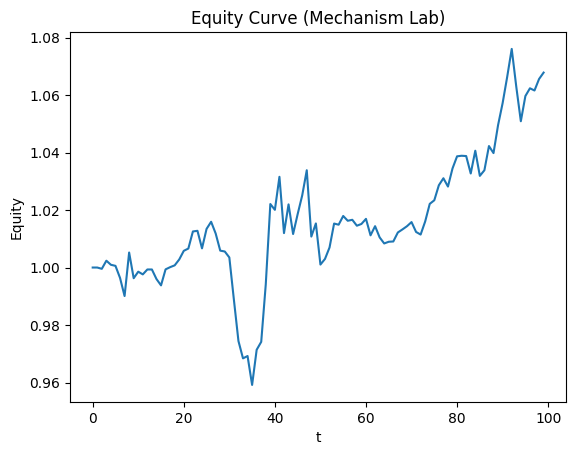

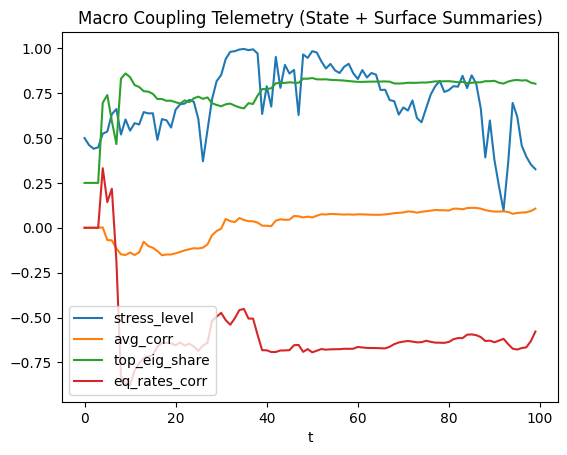

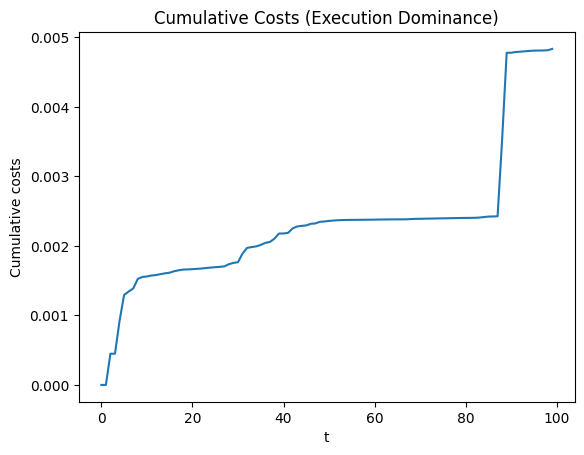

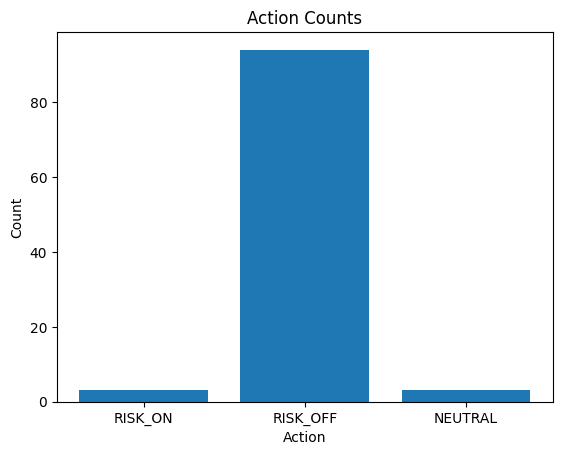

SUMMARY METRICS: {'final_equity': 1.0678114634797167, 'total_return': 0.06781146347971667, 'max_drawdown': 0.05586808120652187, 'avg_leverage': 0.7467308546120682, 'avg_turnover': 0.07191853927179763, 'total_costs': 0.0048329287441339075, 'avg_cost_per_step': 4.832928744133907e-05, 'pnl_sharpe_like': 1.583753945344713, 'verification_status': 'Not verified'}


,mechanism,observation,fragility,execution_note,lesson,verification_status
0,Stress factor raises cross-asset commonality (...,avg_corr and top_eig_share rise in stress; equ...,Diversification collapses; portfolios become r...,Liquidity_mult and impact proxy amplify costs;...,"IN STRESS, THE WORLD BECOMES ONE TRADE.",Not verified
1,Rates hedge is regime-local; sign/magnitude of...,"eq_rates_corr can approach 0 or flip, reducing...",Hedge failure increases drawdown sensitivity t...,Leverage cap forces trade-offs between hedging...,"HEDGES ARE REGIME-LOCAL PROPERTIES, NOT PERMAN...",Not verified
2,Carry-like drift pays in calm but is taxed (or...,Risk-on gains are slow; stress losses are fast...,Optimization becomes path-dependent; late de-r...,Drawdown stop shifts objective to survival; NE...,SURVIVAL CONSTRAINTS DOMINATE OPTIMIZATION UND...,Not verified


BUNDLE: /content/deliverables_ch9_ch9_9_1770653031.zip


In [23]:
# %% CELL 10 — CODE: DIAGNOSTICS + METRICS + INTERPRETIVE TABLE + BUNDLE

equity = np.array([r["economics"]["equity"] for r in step_logs], dtype=float)
dd = np.array([r["economics"]["drawdown"] for r in step_logs], dtype=float)
costs = np.array([r["economics"]["costs"] for r in step_logs], dtype=float)
pnl = np.array([r["economics"]["pnl"] for r in step_logs], dtype=float)
lev = np.array([r["economics"]["leverage"] for r in step_logs], dtype=float)
turn = np.array([r["execution"]["turnover"] for r in step_logs], dtype=float)
act_series = pd.Series([r["decision"]["action"] for r in step_logs])

cum_cost = np.cumsum(costs)

def sharpe_like(x: np.ndarray) -> float:
    m = float(np.mean(x))
    s = float(np.std(x) + 1e-12)
    return float(m / s * math.sqrt(252))

metrics = {
    "final_equity": float(equity[-1]),
    "total_return": float(equity[-1] - 1.0),
    "max_drawdown": float(np.max(dd)),
    "avg_leverage": float(np.mean(lev)),
    "avg_turnover": float(np.mean(turn)),
    "total_costs": float(np.sum(costs)),
    "avg_cost_per_step": float(np.mean(costs)),
    "pnl_sharpe_like": sharpe_like(pnl),
    "verification_status": "Not verified",
}

# Plots
plt.figure()
plt.plot(equity)
plt.title("Equity Curve (Mechanism Lab)")
plt.xlabel("t")
plt.ylabel("Equity")
plt.show()

plt.figure()
plt.plot(stress_level, label="stress_level")
plt.plot(avg_corr, label="avg_corr")
plt.plot(top_eig_share, label="top_eig_share")
plt.plot(eq_rates_corr, label="eq_rates_corr")
plt.title("Macro Coupling Telemetry (State + Surface Summaries)")
plt.xlabel("t")
plt.legend()
plt.show()

plt.figure()
plt.plot(cum_cost)
plt.title("Cumulative Costs (Execution Dominance)")
plt.xlabel("t")
plt.ylabel("Cumulative costs")
plt.show()

counts = act_series.value_counts().reindex(ACTIONS).fillna(0).astype(int)
plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Action Counts")
plt.xlabel("Action")
plt.ylabel("Count")
plt.show()

interpretive = pd.DataFrame([
    {
        "mechanism": "Stress factor raises cross-asset commonality (coupling) and tail risk.",
        "observation": "avg_corr and top_eig_share rise in stress; equity drawdowns cluster.",
        "fragility": "Diversification collapses; portfolios become redundant exposures to one factor.",
        "execution_note": "Liquidity_mult and impact proxy amplify costs; rebalancing becomes punitive.",
        "lesson": "IN STRESS, THE WORLD BECOMES ONE TRADE.",
        "verification_status": "Not verified",
    },
    {
        "mechanism": "Rates hedge is regime-local; sign/magnitude of eq–rates correlation can drift.",
        "observation": "eq_rates_corr can approach 0 or flip, reducing hedge reliability.",
        "fragility": "Hedge failure increases drawdown sensitivity to timing and leverage caps.",
        "execution_note": "Leverage cap forces trade-offs between hedging and risk premia exposure.",
        "lesson": "HEDGES ARE REGIME-LOCAL PROPERTIES, NOT PERMANENT FACTS.",
        "verification_status": "Not verified",
    },
    {
        "mechanism": "Carry-like drift pays in calm but is taxed (or reverses) in stress.",
        "observation": "Risk-on gains are slow; stress losses are fast (convexity of bad states).",
        "fragility": "Optimization becomes path-dependent; late de-risking can’t outrun gaps + costs.",
        "execution_note": "Drawdown stop shifts objective to survival; NEUTRAL becomes a rational endpoint.",
        "lesson": "SURVIVAL CONSTRAINTS DOMINATE OPTIMIZATION UNDER COUPLING.",
        "verification_status": "Not verified",
    },
])

# Save deliverables
with open(os.path.join(DELIV_DIR, "summary_metrics.json"), "w") as f:
    json.dump(metrics, f, indent=2)
interpretive_path = os.path.join(DELIV_DIR, "interpretive_table.csv")
interpretive.to_csv(interpretive_path, index=False)

print("SUMMARY METRICS:", metrics)
display(interpretive)

# Bundle
import shutil
zip_path = shutil.make_archive(os.path.join(BASE_DIR, f"deliverables_ch9_{run_id}"), "zip", DELIV_DIR)
print("BUNDLE:", zip_path)


##11.CONCLUSION

**Conclusion**

**What was learned, in mechanism terms**

This laboratory is designed to replace a vague risk-management slogan with a concrete causal sequence: coupling strengthens in stress because shared constraints synchronize liquidation, and that synchronization reshapes the tradable surface that governs portfolio outcomes. The notebook’s synthetic world makes this sequence explicit. Regimes are persistent, transitions are meaningful, and stress is a latent factor that drives both return comovement and the feasibility of execution. Within that world, the correlation tensor and rolling covariance cube are not secondary diagnostics. They are the objects that determine the geometry of risk and the marginal payoff to any portfolio adjustment. The dominant lesson is not that “correlations go up.” It is that the number of independent risk directions collapses, and portfolios that appeared diversified become redundant exposures to a single dominant factor. When that collapse coincides with deteriorating liquidity, the environment turns theoretical rebalancing into realized fragility.

**Structural insight: covariance is an equilibrium price of risk geometry**

In many markets, a surface is read as a price object: yield curves price time, volatility surfaces price convexity, spread curves price default and liquidity. In this chapter, the surface prices something even more foundational: how risks combine. The covariance structure is the mapping from positions to portfolio variance, from hedges to hedge effectiveness, and from leverage to survivability. Treating this mapping as tradable is not metaphorical. A change in the surface changes the effective payoff of a position even if marginal expected returns are unchanged, because the portfolio’s risk budget and constraints are defined in this geometry. The notebook reinforces this by extracting interpretable summaries: average correlation as a coupling level, eigenvalue concentration as a “one-trade” intensity measure, and equity–rates correlation as a hedge reliability proxy. These are not claimed to be sufficient statistics; they are deliberately minimal features that a bounded agent can act upon.

**Fragility modes observed in the laboratory**

Several fragility modes are not only possible but structurally encouraged by the mechanism.

One fragility is diversification failure. When eigenvalue concentration rises, additional assets add less independent risk reduction. Risk parity scaling can continue to scale positions using diagonal vol estimates, but the benefit of spreading exposure across assets shrinks because the off-diagonal structure dominates. The notebook’s coupling penalty is an explicit acknowledgement of this: when the world becomes one factor, it is rational to reduce gross exposure even if individual vol estimates have not exploded. This is a geometric fragility rather than a forecasting error.

A second fragility is hedge failure. The equity–rates relationship is not an immutable law; it is a regime-local equilibrium outcome shaped by policy credibility, inflation shocks, and funding conditions. In many historical episodes, rates rally when equities sell off, but there are also episodes where rates sell off alongside equities. In the laboratory, hedge reliability is tracked and made operational through the equity–rates correlation proxy. The point is not to predict when the hedge fails, but to recognize that the hedge is conditional on the surface, and that the surface can move faster than a policy can re-hedge under execution costs.

A third fragility is tail clustering under persistence. Stress regimes are persistent and tail events are more likely in stress. This creates a structural asymmetry: premia accumulate slowly in calm and can be withdrawn quickly in stress. The laboratory encodes this asymmetry through regime-dependent tail probabilities and the stress-linked common shock. This matters because constraint systems react to realized drawdowns, not to expected values. A portfolio can be “right on average” and still be forced into de-risking at an inopportune time.

A fourth fragility is path dependence under execution constraints. The same target posture can have different realized outcomes depending on the path taken to reach it, because costs are proportional to turnover and amplified by stress and coupling. In practice, this means that what looks like a clean regime switch in a model becomes a messy sequence of expensive micro-adjustments. The drawdown stop is an explicit survival constraint that turns this path dependence into a state variable: once drawdown is large enough, the feasible set of actions collapses toward neutrality.

**Execution dominates theory, especially under coupling**

The notebook’s execution layer is not an afterthought; it is the mechanism that makes the laboratory professionally honest. In stress, liquidity worsens and the crowding of flows increases impact. The model reflects this by multiplying costs with regime-dependent liquidity factors and by linking impact to both stress and coupling. This linkage is the critical lesson: the surface that makes diversification less effective is the same surface that makes trading more expensive, because coupling corresponds to synchronized behavior. In other words, the time you most want to rebalance is the time the market charges you most to do so. This is why “optimal” theoretical posture changes can be dominated by a simpler professional rule: reduce turnover, preserve optionality, and respect survival constraints. The NEUTRAL action is not a failure to decide; it is an admissible professional posture when the state is ambiguous and execution costs are punitive.

**How to iterate experimentally, with hypotheses**

This laboratory is meant to be varied systematically. The appropriate iteration is not “tune until performance looks good,” but “vary a mechanism parameter to test a structural hypothesis.”

Changing regime persistence tests whether fragility is driven by long stress episodes or by frequent transitions. Increasing stress persistence should increase the value of early de-risking and increase the importance of drawdown controls, because the agent is less likely to be bailed out by a quick reversion.

Changing the coupling tensor tests whether diversification failure is an artifact of a particular correlation pattern or a general consequence of eigenvalue concentration. Increasing stress-state correlations or making stress correlations more uniform should increase eigenvalue share and reduce the effective dimension of risk, stressing risk parity assumptions.

Changing tail probabilities and tail scales tests the convexity of bad states. Higher tail probability in transition regimes can produce more “false starts,” where the surface changes temporarily and the agent is tempted into costly rebalancing.

Changing liquidity multipliers and impact elasticity tests execution dominance. If costs are mild, more active switching can look attractive. If costs are severe, the same switching becomes self-defeating. This is a professional reminder that “signal quality” is not the limiting factor if implementation is the bottleneck.

Changing leverage caps and drawdown thresholds tests survival constraints. Lower leverage caps reduce both gains and losses and can make regime switching less urgent. Tighter drawdown stops force the system into neutrality earlier, demonstrating how governance can dominate optimization.

The discipline in these experiments is to write the hypothesis first. Then vary one mechanism parameter. Then interpret changes through the diagnostic stack: equity curve, coupling telemetry, costs, action counts, and the interpretive table. The goal is to develop intuition about the surface and constraints, not to hunt a superior backtest.

**Professional intuition reinforced by this chapter**

The final professional intuition is simple and severe: diversification is not a static promise; it is a regime-local outcome that can disappear when constraints bind. Correlation is not merely something to estimate; it is the tradable geometry that governs what portfolios can do and what it costs them to change. In stress, the world becomes one trade not because the assets are identical, but because the marginal investor’s constraint set becomes identical across assets. When that happens, execution is the reality. It translates geometric fragility into realized drawdown through costs, impact, and forced de-risking. A mechanism-first approach therefore begins not with expected returns, but with the surface and the constraints that shape feasible action. The notebook’s bounded action space, strict logging, and survival overlays are not limitations; they are the correct professional lens for learning how cross-asset systems fail.

If you treat this laboratory as a map, the map is not a forecast of where markets will go. It is a map of how a cross-asset system behaves when coupling strengthens, when hedges become regime-local, and when execution costs turn theoretical control into realized fragility. The punchline remains: in stress, the world becomes one trade, and your job is to understand the surface that makes that true.
